# 岭回归

## 共线性对模型系数的影响

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# X is the 10x10 Hilbert matrix
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)
X,y

(array([[1.        , 0.5       , 0.33333333, 0.25      , 0.2       ,
         0.16666667, 0.14285714, 0.125     , 0.11111111, 0.1       ],
        [0.5       , 0.33333333, 0.25      , 0.2       , 0.16666667,
         0.14285714, 0.125     , 0.11111111, 0.1       , 0.09090909],
        [0.33333333, 0.25      , 0.2       , 0.16666667, 0.14285714,
         0.125     , 0.11111111, 0.1       , 0.09090909, 0.08333333],
        [0.25      , 0.2       , 0.16666667, 0.14285714, 0.125     ,
         0.11111111, 0.1       , 0.09090909, 0.08333333, 0.07692308],
        [0.2       , 0.16666667, 0.14285714, 0.125     , 0.11111111,
         0.1       , 0.09090909, 0.08333333, 0.07692308, 0.07142857],
        [0.16666667, 0.14285714, 0.125     , 0.11111111, 0.1       ,
         0.09090909, 0.08333333, 0.07692308, 0.07142857, 0.06666667],
        [0.14285714, 0.125     , 0.11111111, 0.1       , 0.09090909,
         0.08333333, 0.07692308, 0.07142857, 0.06666667, 0.0625    ],
        [0.125     , 0.1111

In [12]:
# #############################################################################
# Compute paths

n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
coefs

[array([   2.64506216,  -27.6037135 ,    7.99290855,  133.67544662,
          18.04324631, -123.85503805, -175.62007128, -113.78633285,
          45.1537937 ,  274.0230349 ]),
 array([   2.77495254,  -30.12097524,   17.90675302,  125.42567292,
          10.71785391, -122.86634606, -168.64643116, -106.59631633,
          46.70073191,  265.2230074 ]),
 array([   2.89641318,  -32.4809857 ,   27.21875336,  117.65911922,
           3.83378283, -121.92541078, -162.07888181,  -99.83164397,
          48.15083611,  256.93547199]),
 array([   3.00959603,  -34.68697191,   35.94234644,  110.36416875,
          -2.61959353, -121.03070346, -155.90693449,  -93.48138692,
          49.50639673,  249.14681228]),
 array([   3.11468966,  -36.74289692,   44.09396763,  103.52649596,
          -8.65488548, -120.18030572, -150.11799128,  -87.53261581,
          50.77013386,  241.84082914]),
 array([   3.21190947,  -38.65326759,   51.69225674,   97.12990952,
         -14.28642114, -119.37201063, -144.69786587,

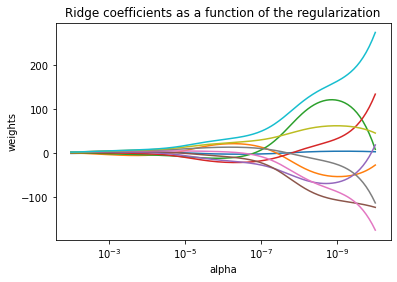

In [15]:
# #############################################################################
# Display results

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

## 岭回归和线性回归的方差比较

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model

In [2]:
X_train = np.c_[.5, 1].T
y_train = [.5, 1]
X_train,y_train

(array([[0.5],
        [1. ]]),
 [0.5, 1])

In [3]:
X_test = np.c_[0, 2].T
X_test

array([[0],
       [2]])

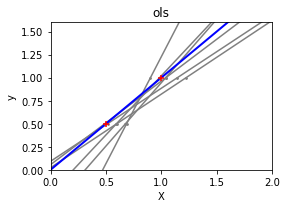

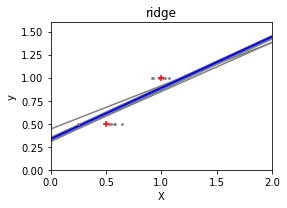

In [4]:
np.random.seed(0)

classifiers = dict(ols=linear_model.LinearRegression(),
                   ridge=linear_model.Ridge(alpha=.1))

for name, clf in classifiers.items():
    fig, ax = plt.subplots(figsize=(4, 3))

    for _ in range(6):
        this_X = .1 * np.random.normal(size=(2, 1)) + X_train
        clf.fit(this_X, y_train)

        ax.plot(X_test, clf.predict(X_test), color='gray')
        ax.scatter(this_X, y_train, s=3, c='gray', marker='o', zorder=10)

    clf.fit(X_train, y_train)
    ax.plot(X_test, clf.predict(X_test), linewidth=2, color='blue')
    ax.scatter(X_train, y_train, s=30, c='red', marker='+', zorder=10)

    ax.set_title(name)
    ax.set_xlim(0, 2)
    ax.set_ylim((0, 1.6))
    ax.set_xlabel('X')
    ax.set_ylabel('y')

    fig.tight_layout()

plt.show()


